#  Part II - Presentation of Telecom Customer Churn Insights

## Chisom Promise Nnamani

## Investigation Overview

In this investigation, I'm most interested in figuring out what features are best for predicting the customer churn in the dataset. i.e how each of the other features determines if the will stay or leave the telecom company.

I will start with the distribution of churn, contract renewal and data plan features, then proceed to see how churn is being affected by contract renewal, data pla, monthly charges, customer service calls, 


## Dataset Overview

This dataset contains 3333 rows representing each customer, with 11 features or variables.

8 of the features which include (account_weeks, data_usage, customer_service_calls, day_mins, day_calls, monthly_charge, overage_fee. roam_mins) are numerical data types, while the other 3 which are (churn, contract_renewal, and data plan) are in categorical data type.

This dataset was sourced from Kaggle and can be obtained via this [link](https://www.kaggle.com/datasets/barun2104/telecom-churn)


**Important questions we expect to be answered via this presentation:**

 1. What variables are contributing to customer churn?
 
 
 2. Who are the customers more likely to churn?
 

 3. What actions can be taken to stop them from leaving?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
customer_data = pd.read_csv('telecom_churn.csv')

### Column Description:

Each row represents a customer and each column contains attributes related to customer as described in the column description.

The “Churn” column is our target variable.

 - **Churn:** 1 if customer cancelled service, 0 if not
 
 
 - **AccountWeeks:** number of weeks customer has had active account
 
 
 - **ContractRenewal:** 1 if customer recently renewed contract, 0 if not
 
 
 - **DataPlan:** 1 if customer has data plan, 0 if not
 

 - **DataUsage:** gigabytes of monthly data usage
 

 - **CustServCalls:** number of calls into customer service
 

 - **DayMins:** average daytime minutes per month
 

 - **DayCalls:** average number of daytime calls
 

 - **MonthlyCharge:** average monthly bill
 

 - **OverageFee:** largest overage fee in last 12 months
 

 - **RoamMins:** average number of roaming minutes

In [3]:
# making copy of original data
customer_info = customer_data.copy()

In [4]:
# Seperate the column labels that are made up two words with a hyphen
customer_info.rename(columns={'AccountWeeks': 'Account_Weeks', 'ContractRenewal': 'Contract_Renewal',
                              'DataPlan': 'Data_Plan', 'DataUsage': 'Data_Usage',
                              'CustServCalls': 'Customer_Service_Calls', 'DayMins': 'Day_Mins', 'DayCalls': 'Day_Calls',
                              'MonthlyCharge': 'Monthly_Charge', 'OverageFee': 'Overage_Fee', 'RoamMins': 'Roam_Mins'}, inplace = True)

# change the name of the column labels to lower case
customer_info.rename(columns=lambda x: x.lower(), inplace=True)

In [5]:
# change the value of the churn, contract_renewal, and data_plan for easy manipulation
customer_info['churn'] = np.where(customer_info['churn'] == 1, 'Cancelled', 'Not Cancelled')
customer_info['contract_renewal'] = np.where(customer_info['contract_renewal'] == 1, 'Renewed', 'Not Renewed')
customer_info['data_plan'] = np.where(customer_info['data_plan'] == 1, 'Data plan', 'No Data Plan')

In [6]:
# change churn, customer_renewal, and data__plan values into category data type
cat_col = ['churn', 'contract_renewal', 'data_plan']
customer_info[cat_col] = customer_info[cat_col].astype('category')

## Distribution of Churn

**For the 'Churn' variable: How high is the proprotion of customers which cancelled the service?**

From the chart and the descriptive statistics of the "Churn" column below, we can see that **483(14.4%) customers were lost** by the telecom company, and **more than 2500(85.5%) were retained by the company**. 483 might seem a small number but that number could have fetch good profit for the Telecom company.

               churn
Not Cancelled   2850
Cancelled        483
                   churn
Not Cancelled  85.508551
Cancelled      14.491449


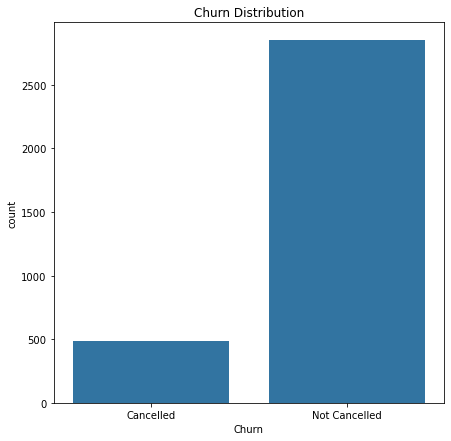

In [7]:
# let's get the value count of each churn value in a data frame
print(pd.DataFrame(customer_info['churn'].value_counts()))

# let's get the percentage of each churn value count
print(pd.DataFrame(customer_info['churn'].value_counts(normalize=True)*100))

color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data=customer_info, x = 'churn', color=color);
plt.xlabel('Churn')
plt.title('Churn Distribution');

## Distribution of Contract Renewal

**For the 'Contract Renewal' variable: How many customers recently renewed their contract?**

From the chart and the descriptive statistics of the "Contract Renewal" column below, we can see that **323(9.7%) customers did not recently renew their contract**, and **3010(90%) recently renewed their contract**. 

             contract_renewal
Renewed                  3010
Not Renewed               323
             contract_renewal
Renewed             90.309031
Not Renewed          9.690969


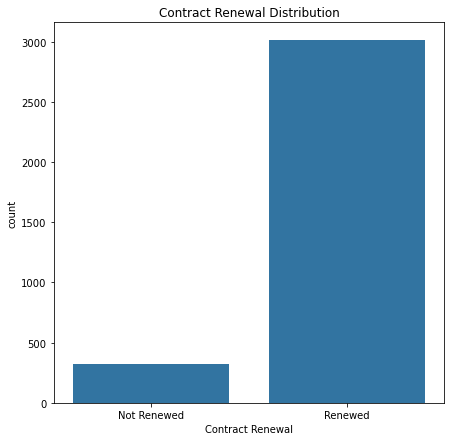

In [8]:
# let's get the value count of each contract renewal value in a data frame
print(pd.DataFrame(customer_info['contract_renewal'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['contract_renewal'].value_counts(normalize=True)*100))

color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data=customer_info, x = 'contract_renewal', color=color);
plt.xlabel('Contract Renewal')
plt.title('Contract Renewal Distribution');

## Distribution of Data Plan

**For the 'Data Plan' variable: How many customers had data plan and how many did not?**

From the chart belo, with the this descriptive statistics of the data plan column, we can see that only **922(27.6%) of the customers have** data plan while **2411(72%) of the customers do not** have data plan. 

              data_plan
No Data Plan       2411
Data plan           922
              data_plan
No Data Plan  72.337234
Data plan     27.662766


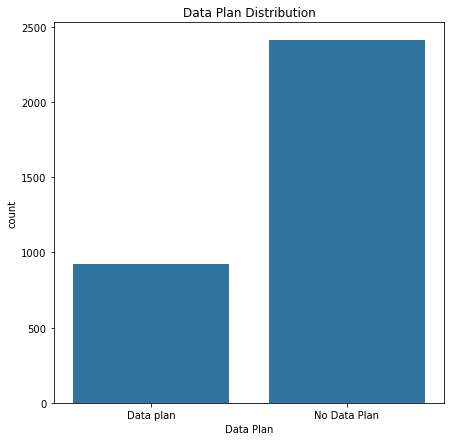

In [9]:
# let's get the value count of each data plan value in a data frame
print(pd.DataFrame(customer_info['data_plan'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['data_plan'].value_counts(normalize=True)*100))

base_color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data = customer_info, x = 'data_plan', color=color);
plt.xlabel('Data Plan')
plt.title('Data Plan Distribution');

## Distribution of Data Usage

For the data usage hist plot: This is the gigabytes of monthly data usage. The plot is skewed to the right, with the highest data usage value being 0. This means that about 2500 customers did not subscribe or use any data monthly.

Text(0.5, 0, 'Data Usage')

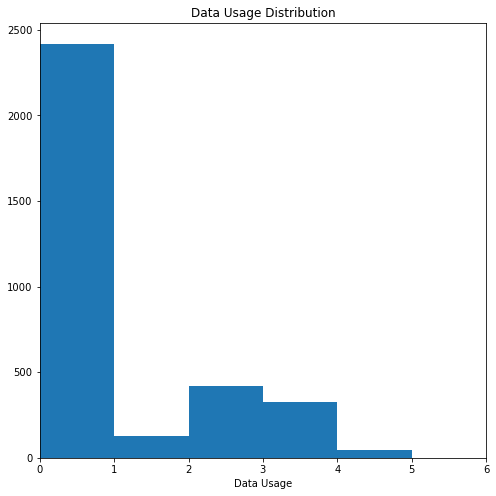

In [10]:
plt.figure(figsize= [8, 8])
bins = np.arange(0, customer_info['data_usage'].max()+1, 1);
plt.hist(data=customer_info, x='data_usage', bins = bins);
plt.xlim(0, 6);
plt.title('Data Usage Distribution')
plt.xlabel('Data Usage')

## Distribution of Monthly Charge

For monthly charge hist plot: This is the average monthly bill charged by the company. The plot is slightly skewed to the right, with most of its customers (more than 800) being charges 40 to 60 dollars monthly.

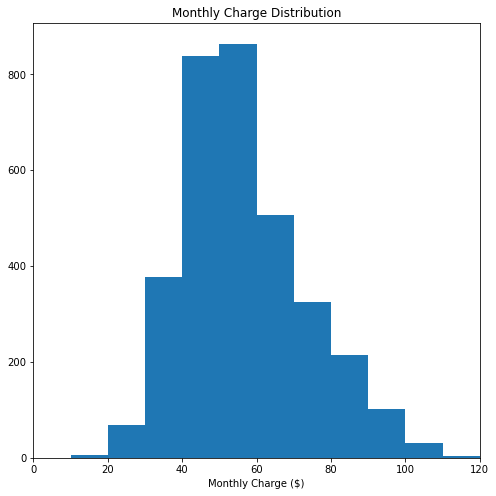

In [11]:
plt.figure(figsize= [8, 8]);
bins = np.arange(10, customer_info['monthly_charge'].max()+10, 10);
plt.hist(data=customer_info, x='monthly_charge', bins = bins);
plt.xlim(0, 120);
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge ($)');

## Distribution of Customer Service Calls

For the customer service calls plot: The plot is skewed to the right, with about 1200 customers making up to 2 customer service calls per day.

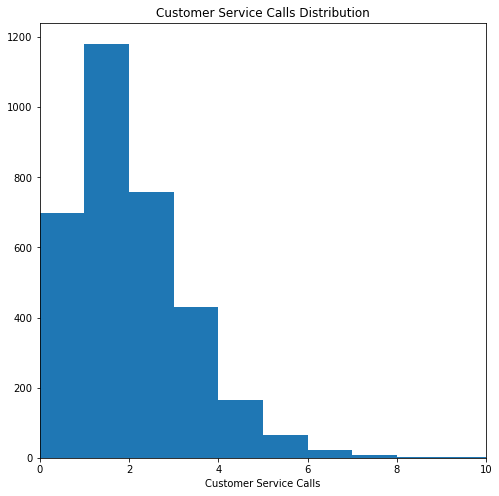

In [12]:
plt.figure(figsize= [8, 8]);
bins = np.arange(0, customer_info['customer_service_calls'].max()+1.1, 1);
plt.hist(data=customer_info, x='customer_service_calls', bins = bins);
plt.xlim(0, 10);
plt.title('Customer Service Calls Distribution')
plt.xlabel('Customer Service Calls');

## Churn vs Data plan
Interesting insight! From our descriptive statistics which backs up our heatmap plot, we could see that about 80(8.5%) of their customers who had data plans were still lost by the company. But a higher percentage of 403(16.7%) who did not have data plan were lost by the company. This means more of customers would be lost if they do not have data plan.

In [13]:
# creating a function that plots a heatmap for two categorical variables
def heat_map(cat_1, cat_2):
    plt.figure(figsize = (8,7))
    # Use group_by() and size() to get number of values in each category
    ct_counts = customer_info.groupby([cat_1, cat_2]).size()

    # Use series.reset_index() to convert a series into a dataframe object
    ct_counts = ct_counts.reset_index(name='count')

    # Use DataFrame.pivot() to rearrange the data, to have data plan values on rows
    ct_counts = ct_counts.pivot(index = cat_1, columns = cat_2, values = 'count')
    
    # plot the heatmap
    sns.heatmap(ct_counts, annot = True, fmt = '.1f', cmap = 'viridis_r');
    plt.title('Count of each {} in each {}'.format(cat_2, cat_1));

                            churn
data_plan                        
Data plan    Not Cancelled    842
             Cancelled         80
No Data Plan Not Cancelled   2008
             Cancelled        403
                                churn
data_plan                            
Data plan    Not Cancelled  91.323210
             Cancelled       8.676790
No Data Plan Not Cancelled  83.284944
             Cancelled      16.715056


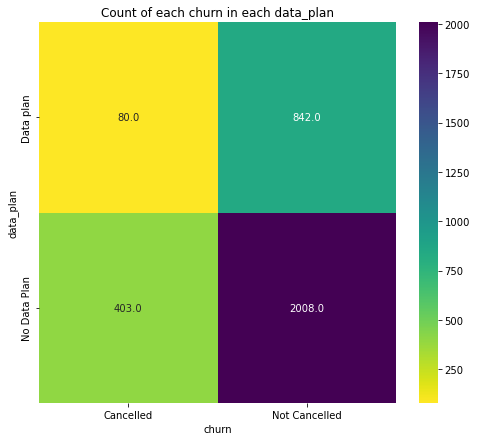

In [14]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts(normalize=True)*100))

heat_map('data_plan', 'churn')

## Churn vs Contract renewal

From this descriptive statistics, we can see that about 137(42%) of the customers who did not recently renewed their contract were lost by the company, while only about 346(11%) of the customers who recently renewed their contract were lost by the company.

So how can we make them to renew their contracts and eventually use more data? Let's look further.

                                churn
contract_renewal                     
Not Renewed      Not Cancelled    186
                 Cancelled        137
Renewed          Not Cancelled   2664
                 Cancelled        346
                                    churn
contract_renewal                         
Not Renewed      Not Cancelled  57.585139
                 Cancelled      42.414861
Renewed          Not Cancelled  88.504983
                 Cancelled      11.495017


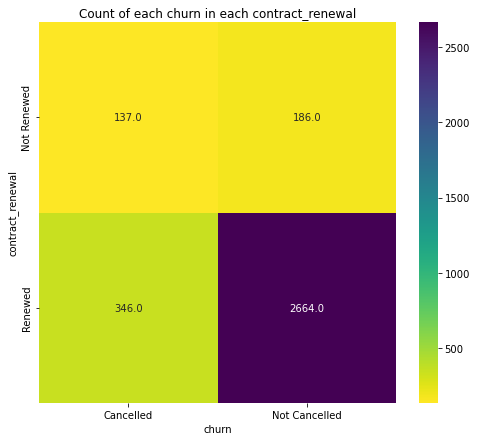

In [15]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts(normalize=True)*100))

heat_map('contract_renewal', 'churn')

## Data plan vs Contract renewal

Okay! This is becoming interesting. From our descriptive statistics, we could see that 231(71%) of the customers who had no data plan did not renew their contract, while only about 830(27%) who had data plans renewed their contract.

So this answers our question to the previous slide. Finding a way to make the customers have more data plan, will eventually make them want to renew their contract.

But we will have to make our data plans more friendly. In the coming slides, we will see why I suggest so.

                               data_plan
contract_renewal                        
Not Renewed      No Data Plan        231
                 Data plan            92
Renewed          No Data Plan       2180
                 Data plan           830
                               data_plan
contract_renewal                        
Not Renewed      No Data Plan  71.517028
                 Data plan     28.482972
Renewed          No Data Plan  72.425249
                 Data plan     27.574751


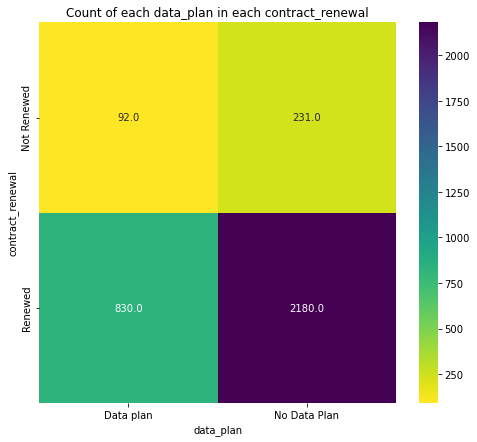

In [16]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts(normalize=True)*100))

heat_map('contract_renewal', 'data_plan')

## Churn vs Data usage

We see both median of the boxplots are at zero. We remember that more than 25000 of its customers had 0 data usage, so these customers cancelled the company's services. Then, only half of the people who use data did not cancel the company. That means some of them must have cancelled the company too. But then majority of the customers who stayed with the company had data usage.

So, we need to find a way to encourage all customers to make more subscriptions.

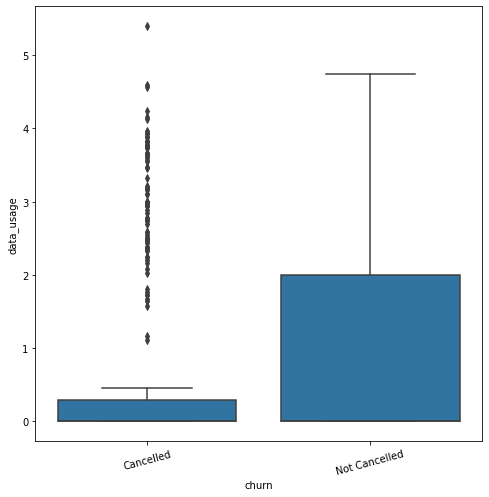

In [17]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='churn', y='data_usage', color=base_color)
plt.xticks(rotation=15);

## Data plan and Data Usage

The plot clearly shows that the customers with no data plan had lowest data usage and the customers who had data plan had a high data usage.

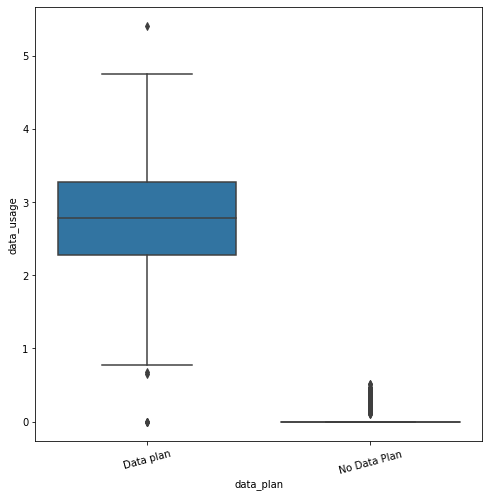

In [18]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='data_plan', y='data_usage', color=base_color)
plt.xticks(rotation=15);

Then this goes to show us how data plan, data usage and contract renewal all have direct impact in customer churn.

**No data plan - No data usage - no contract renewal - Customer churn**

Now, let's look at how more of these features helps to predict if the customer will stay or not.

## Churn vs Data usage vs Monthly Charge

We could see that there is a positive correlation between data usage and monthly charge, and they both affect customer churn. What we can also observe is that most customers with low to no data usage but a high monthly charge left the company.

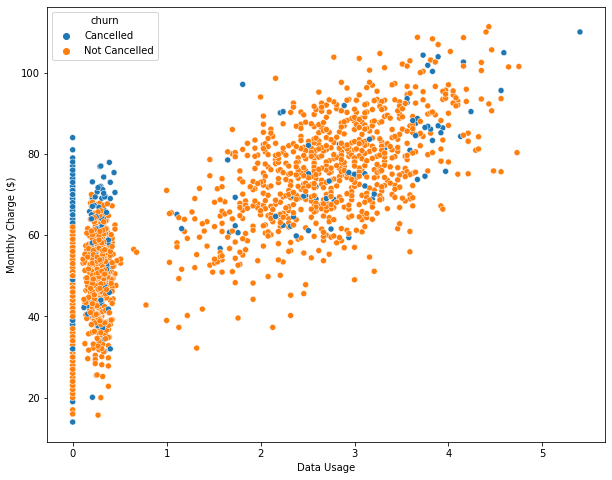

In [19]:
# Create scatterplot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = customer_info, x = 'data_usage', y = 'monthly_charge', hue = 'churn');
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

## Churn vs Day minutes vs Monthly Charge

There is also a positive relationship between the average daytime minutes per month and the monthly charge. Here we can additionally observe one surprising fact. Almost all customers with a monthly charge between 60 and 80 and average daytime minutes per month above 200 left the company. The other leavers are well distributed in this scatterplot.

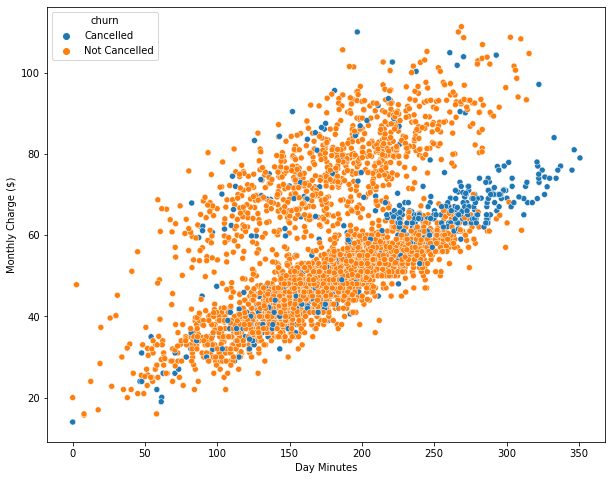

In [20]:
# Create scatterplot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = customer_info, x = 'day_mins', y = 'monthly_charge', hue = 'churn');
plt.xlabel('Day Minutes')
plt.ylabel('Monthly Charge ($)');

## Contract renewal vs Data usage vs Monthly Charge

We see the sparsely scattered data points, showing few customers who do not use data and even those who use data are charged high monthly, but only few of them begins to decide not to renew their contracts.

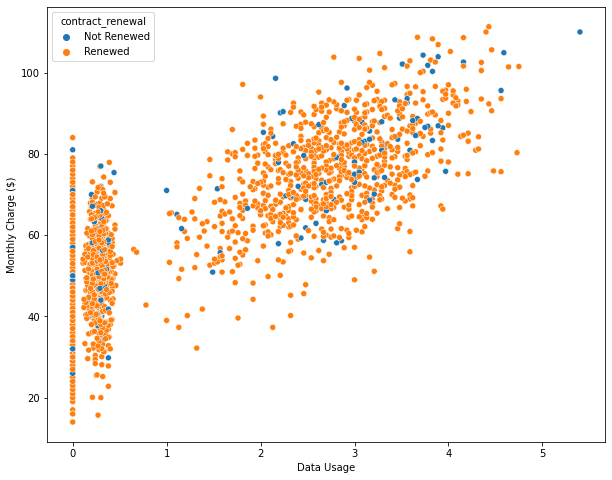

In [21]:
# Create scatterplot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = customer_info, x = 'data_usage', y = 'monthly_charge', hue = 'contract_renewal', cmap='vlag');
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

## Churn vs Data plan vs Data Usage

The number of customers who had data plan and high data usage were more. We could see that they also later cancelled their contracts. It might be that the data plans are not firendly.

In [22]:
# A function to create a bivariate barplot of two categorical variable and one numeric variable
def barplot(cat_var1, num_var, cat_var2):
    plt.figure(figsize = (7, 7))
    sns.barplot(data = customer_info, x = cat_var1, y = num_var, hue = cat_var2, errwidth = 0)
    plt.ylabel('{}'.format(num_var));

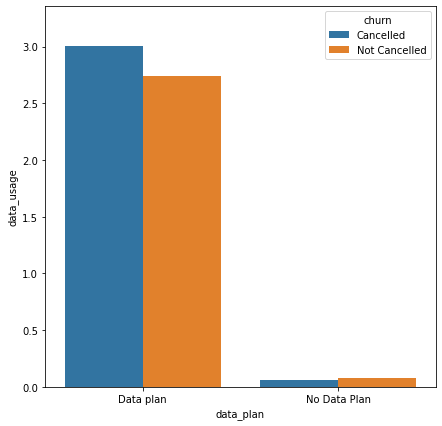

In [23]:
barplot('data_plan', 'data_usage', 'churn')

## Churn vs Data usage vs Contract renewal

More of the customers had high data usage but did not renew their contracts, were eventually lost by the company. From the proof we have seeen from the data, the high data usage could have risen from high monthly charges, and which would have resulted from unfriendly data plan.

I sstill suggest the data plans should be reviewed and made more friendly.

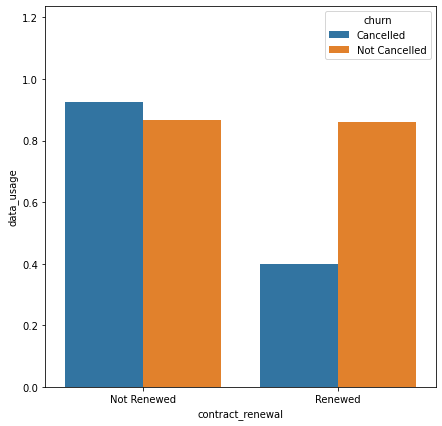

In [24]:
barplot('contract_renewal', 'data_usage', 'churn')

## Churn vs Customer Servive Calls vs Contract Renewal

We could see that the customers whole made an average of 2.5 calls to to customer service, had their contract renewed but they eventually left the company or cancelled the company's services.

I suggest that more improvements should be made in the customer service department.

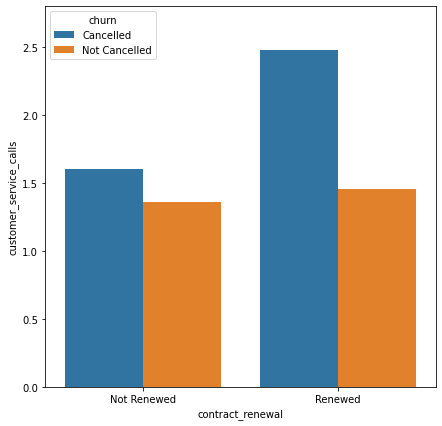

In [25]:
barplot('contract_renewal', 'customer_service_calls', 'churn')

**Generate Slideshow:** Once you're ready to generate your slideshow, use the jupyter nbconvert command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [26]:
# jupyter nbconvert Telecom_Customer_Churn_Data_Exploration_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel.